In [3]:
#import the library
import numpy as np
import pandas as pd
import missingno as msno

import plotly.express as px

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_diabetes
import warnings
warnings.filterwarnings("ignore")

In [4]:
#load dataset

data=pd.read_csv('C:\\Users\\hprab\\Downloads\\archive\\water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
#data processing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
data.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [8]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
data[10:25]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
12,7.119824,156.704993,18730.813653,3.606036,282.344050,347.715027,15.929536,79.500778,3.445756,0
13,NaN,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
14,7.496232,205.344982,28388.004887,5.072558,NaN,444.645352,13.228311,70.300213,4.777382,0
15,6.347272,186.732881,41065.234765,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348,0
16,7.051786,211.049406,30980.600787,10.094796,NaN,315.141267,20.397022,56.651604,4.268429,0
17,9.181560,273.813807,24041.326280,6.904990,398.350517,477.974642,13.387341,71.457362,4.503661,0
18,8.975464,279.357167,19460.398131,6.204321,NaN,431.443990,12.888759,63.821237,2.436086,0
19,7.371050,214.496610,25630.320037,4.432669,335.754439,469.914551,12.509164,62.797277,2.560299,0


<Axes: >

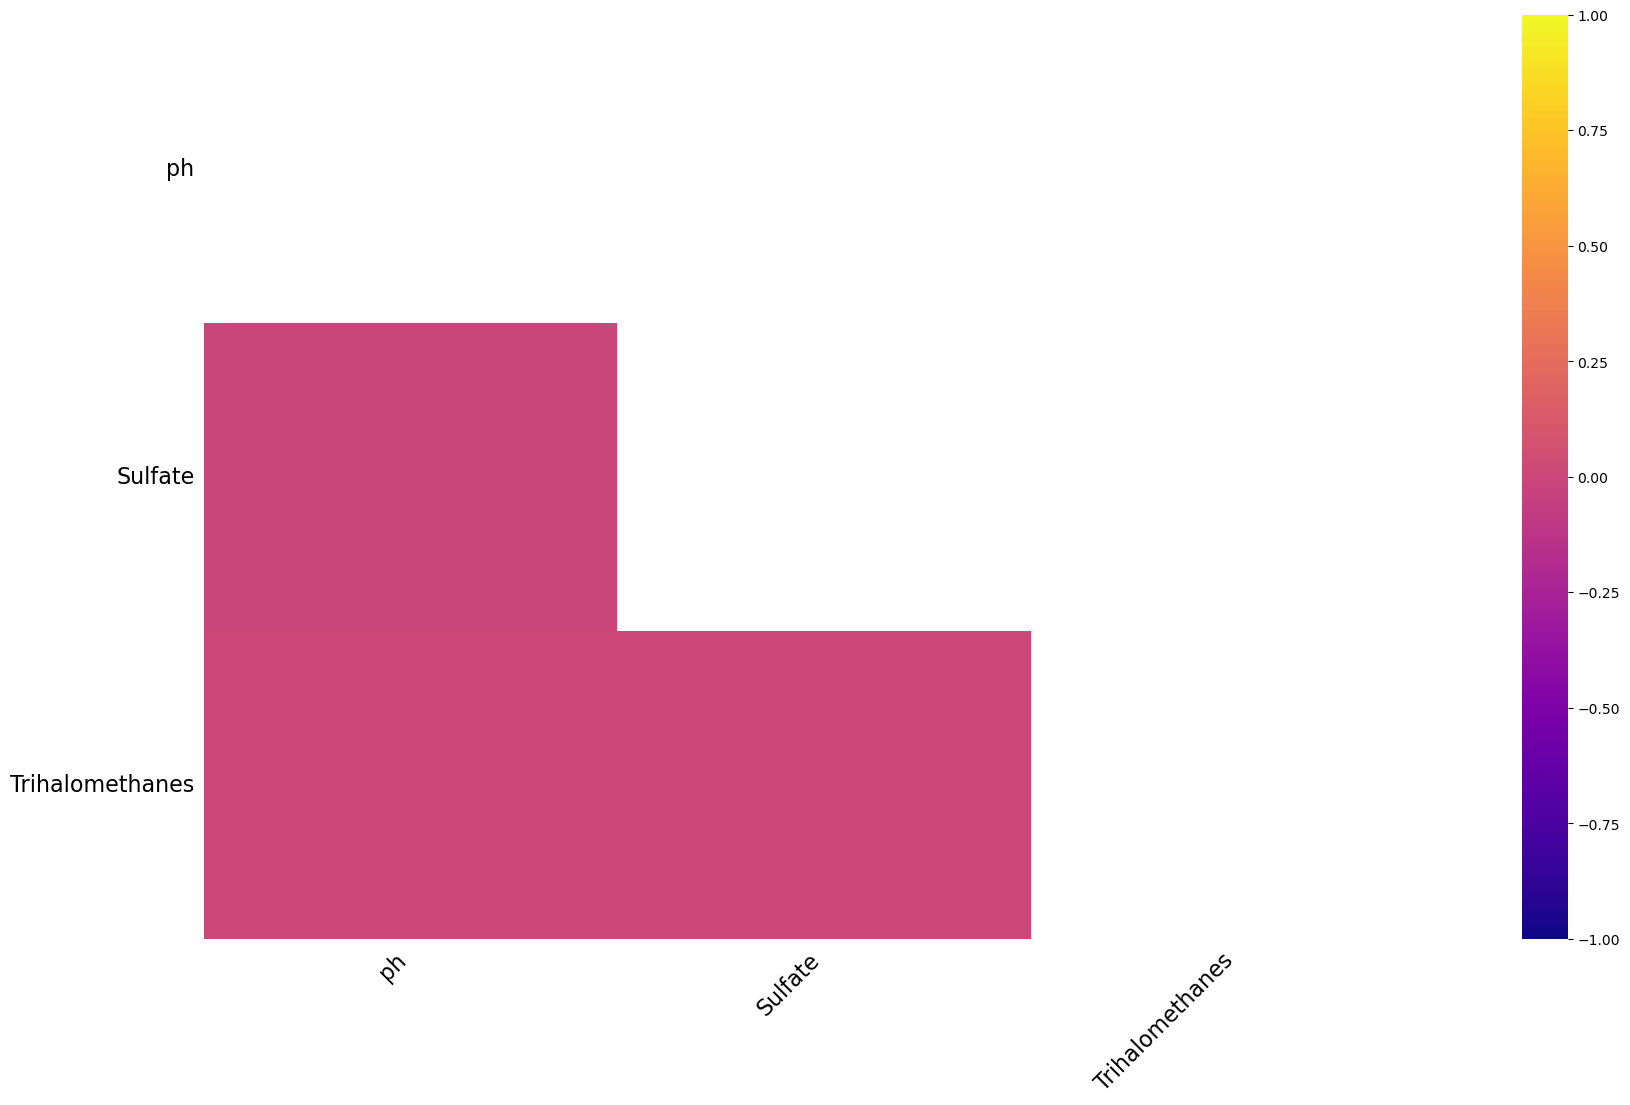

In [10]:
msno.heatmap(data,cmap='plasma')

<Axes: >

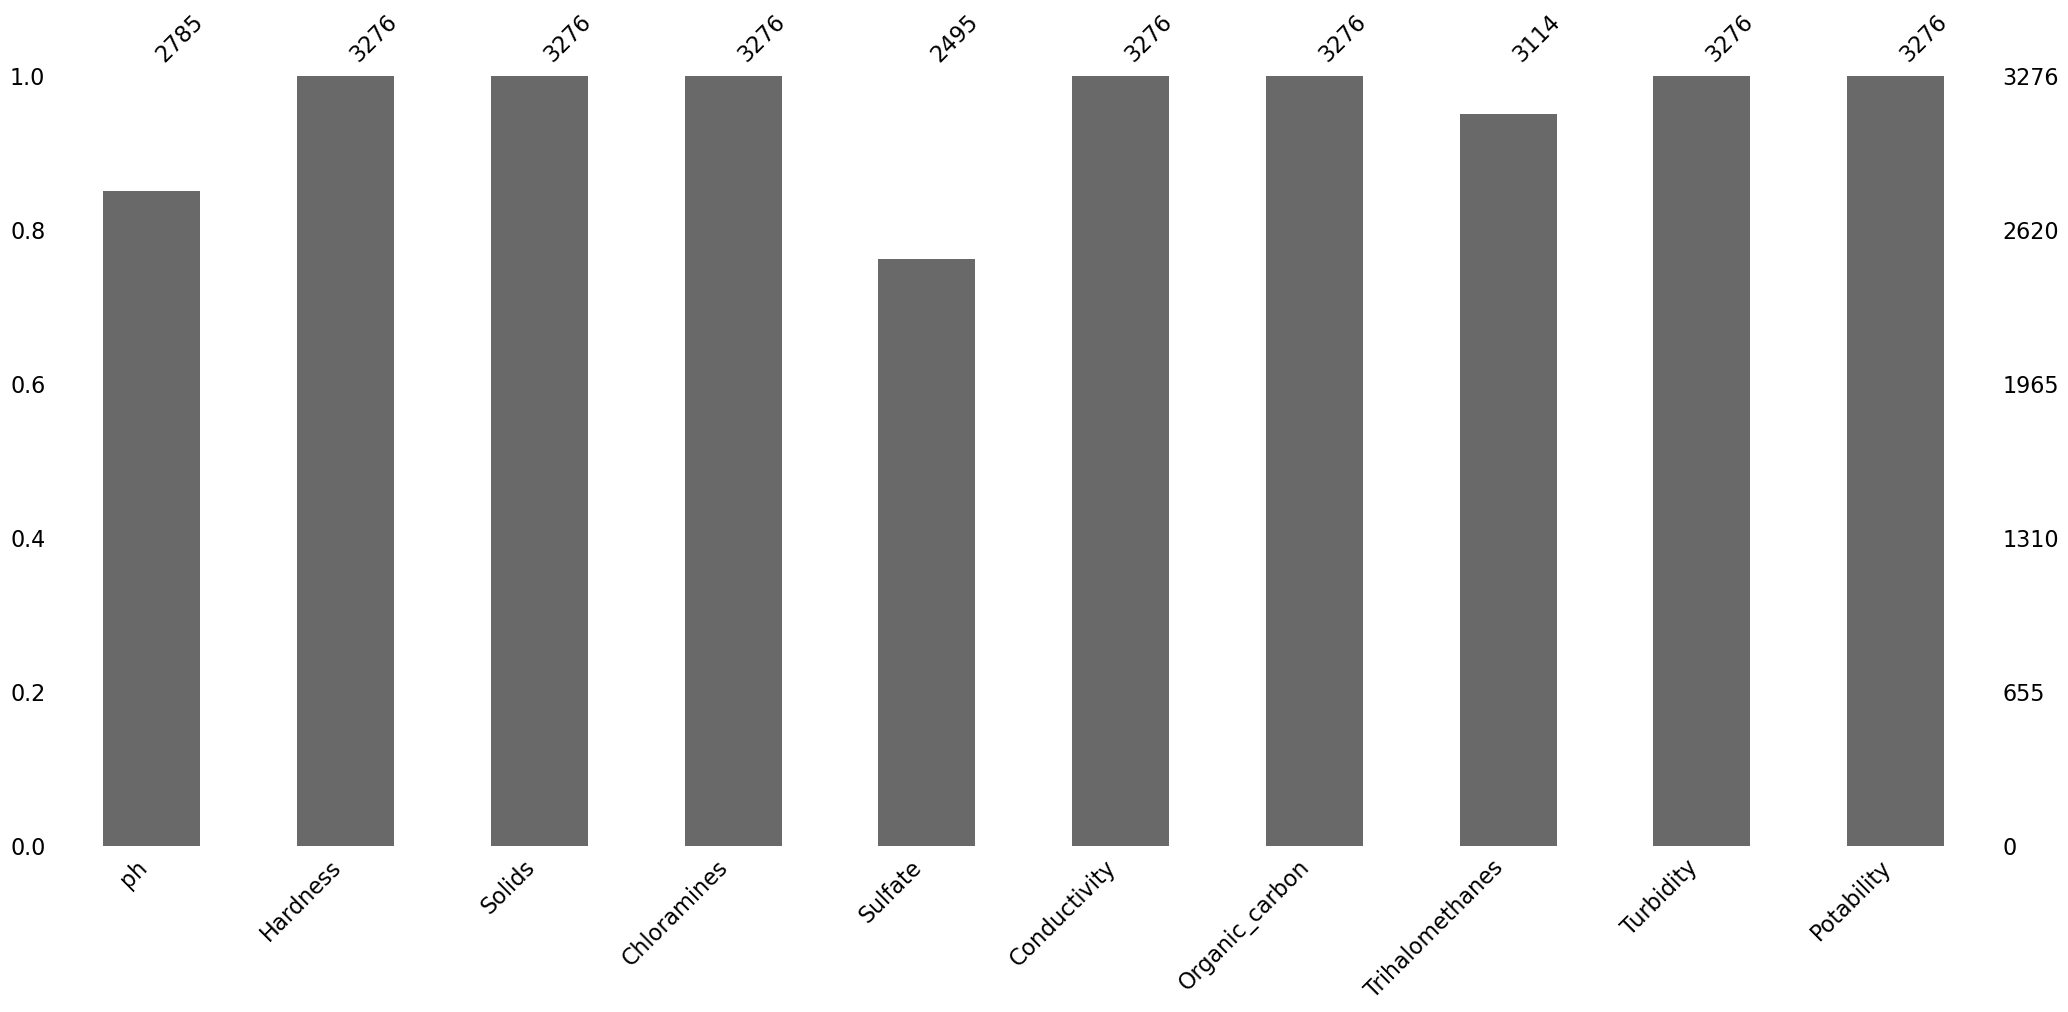

In [11]:
msno.bar(data)

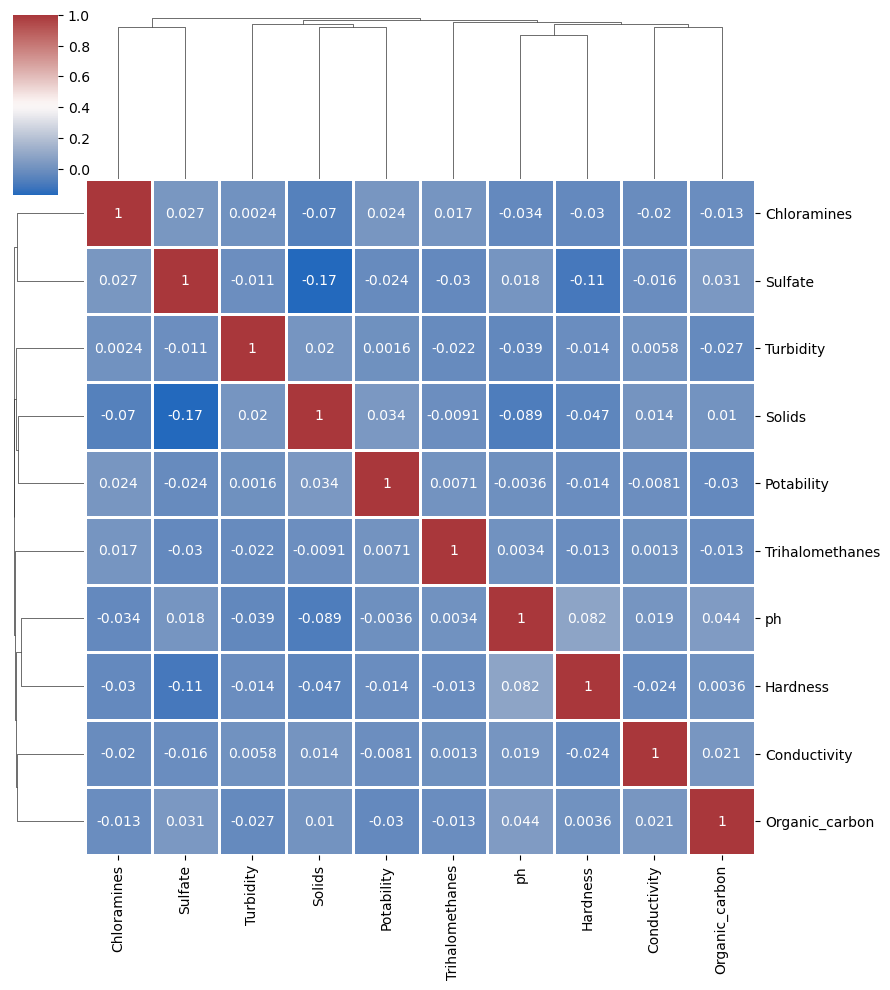

In [12]:
sns.clustermap(data.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()


In [13]:
#handdling missing value

data["ph"].fillna(value = data["ph"].mean(), inplace = True),
data["Sulfate"].fillna(value = data["Sulfate"].mean(), inplace = True),
data["Trihalomethanes"].fillna(value = data["Trihalomethanes"].mean(), inplace = True)


In [14]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
data[10:25]
 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0
11,7.974522,218.693300,18767.656682,8.110385,333.775777,364.098230,14.525746,76.485911,4.011718,0
12,7.119824,156.704993,18730.813653,3.606036,282.344050,347.715027,15.929536,79.500778,3.445756,0
13,7.080795,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
14,7.496232,205.344982,28388.004887,5.072558,333.775777,444.645352,13.228311,70.300213,4.777382,0
15,6.347272,186.732881,41065.234765,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348,0
16,7.051786,211.049406,30980.600787,10.094796,333.775777,315.141267,20.397022,56.651604,4.268429,0
17,9.181560,273.813807,24041.326280,6.904990,398.350517,477.974642,13.387341,71.457362,4.503661,0
18,8.975464,279.357167,19460.398131,6.204321,333.775777,431.443990,12.888759,63.821237,2.436086,0
19,7.371050,214.496610,25630.320037,4.432669,335.754439,469.914551,12.509164,62.797277,2.560299,0


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_features = scaler.fit_transform(data)

print(standardized_features)

[[-6.04313345e-16  2.59194711e-01 -1.39470871e-01 ...  1.30614943e+00
  -1.28629758e+00 -7.99774743e-01]
 [-2.28933938e+00 -2.03641367e+00 -3.85986650e-01 ... -6.38479983e-01
   6.84217891e-01 -7.99774743e-01]
 [ 6.92867789e-01  8.47664833e-01 -2.40047337e-01 ...  1.50940884e-03
  -1.16736546e+00 -7.99774743e-01]
 ...
 [ 1.59125368e+00 -6.26829230e-01  1.27080989e+00 ...  2.18748247e-01
  -8.56006782e-01  1.25035206e+00]
 [-1.32951593e+00  1.04135450e+00 -1.14405809e+00 ...  7.03468419e-01
   9.50797383e-01  1.25035206e+00]
 [ 5.40150905e-01 -3.85462310e-02 -5.25811937e-01 ...  7.80223466e-01
  -2.12445866e+00  1.25035206e+00]]


In [17]:
cols = []
for col in data.columns:
    if data[col].dtype == float:
        cols.append(col)
        
cols

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

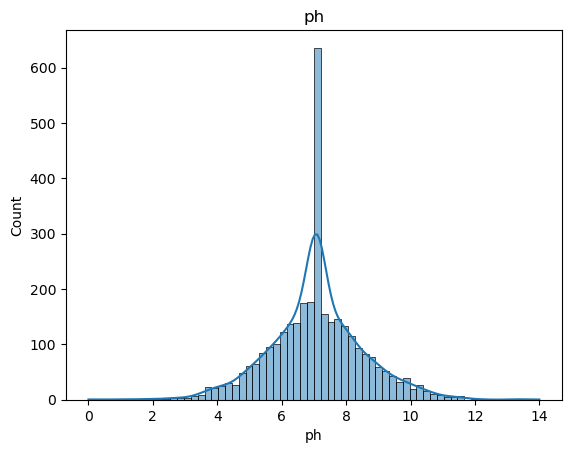

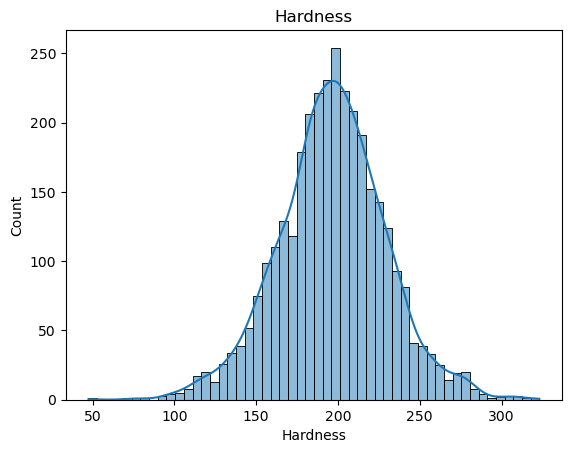

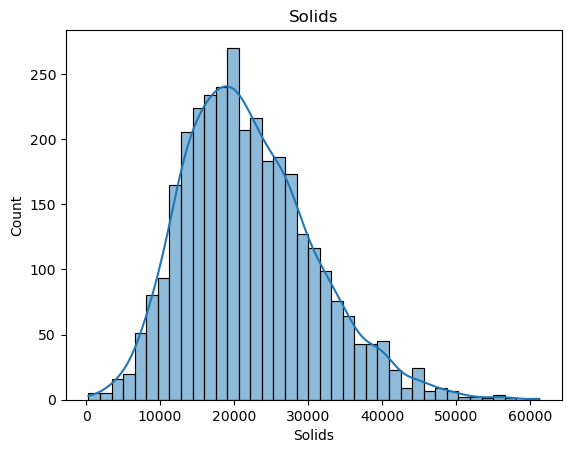

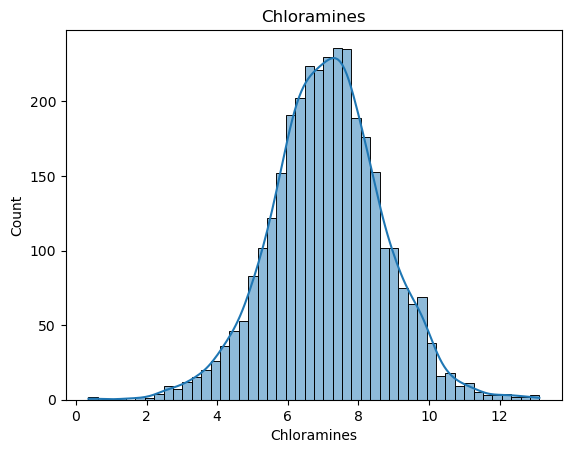

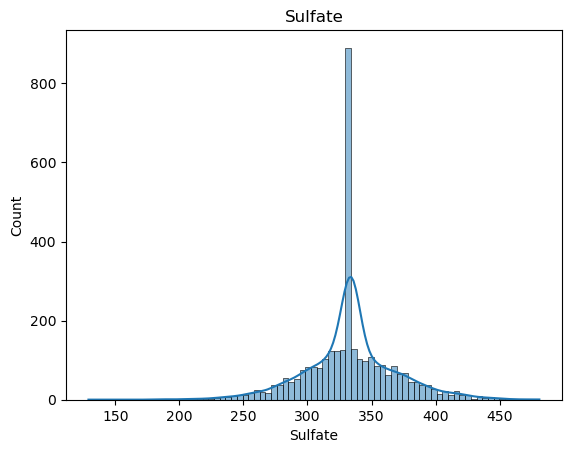

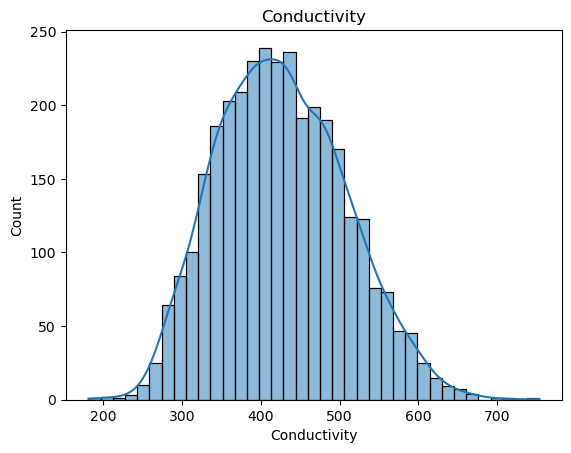

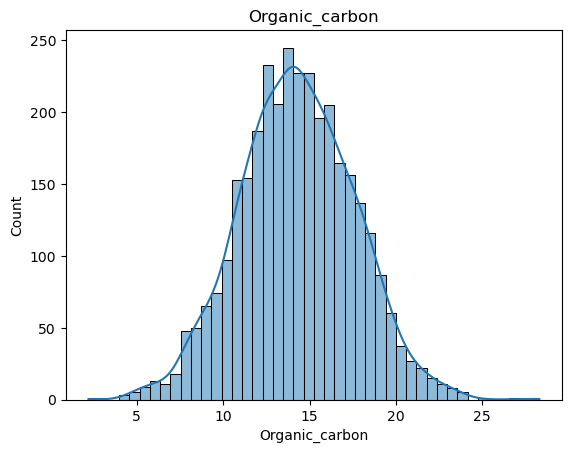

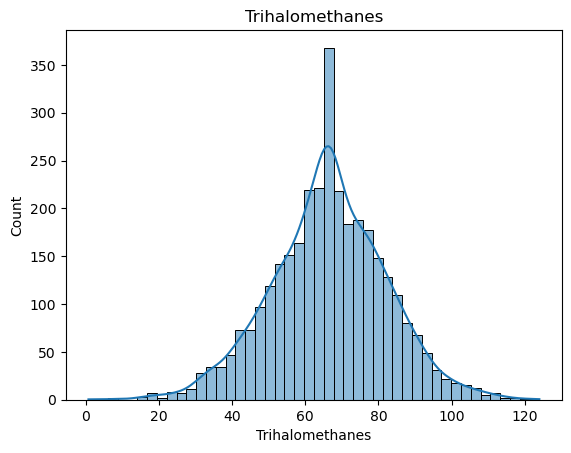

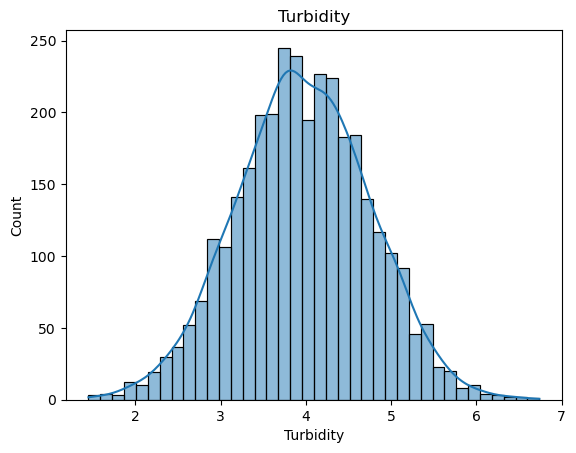

In [18]:

for col in cols:
    plt.figure()
    sns.histplot(data=data, x=col, kde=True)
    plt.title(col)
    plt.show()

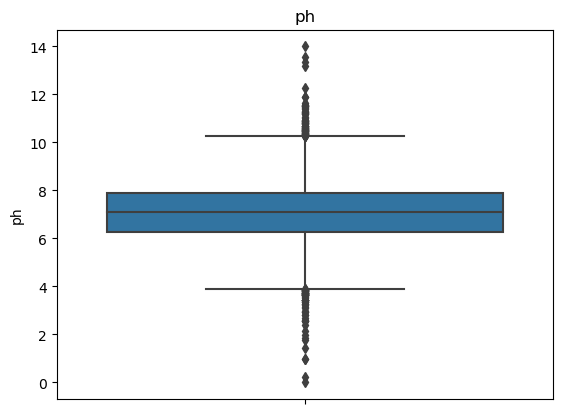

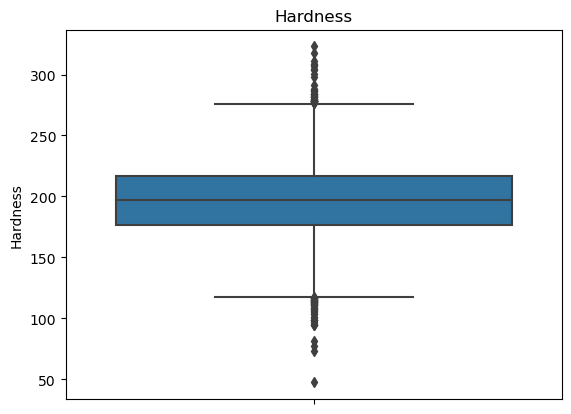

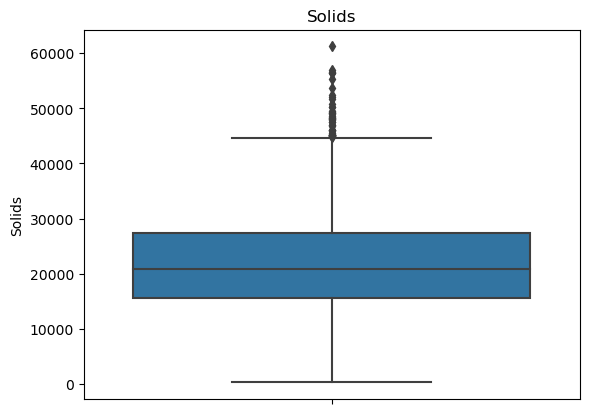

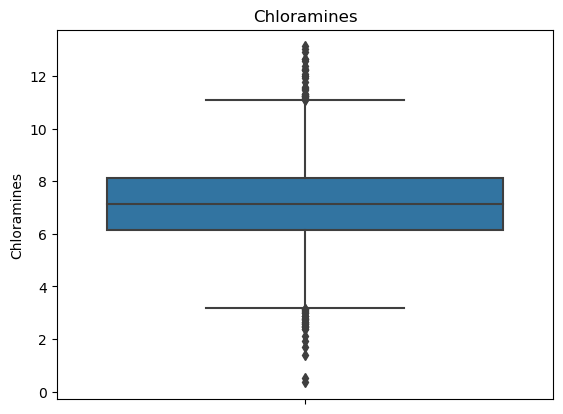

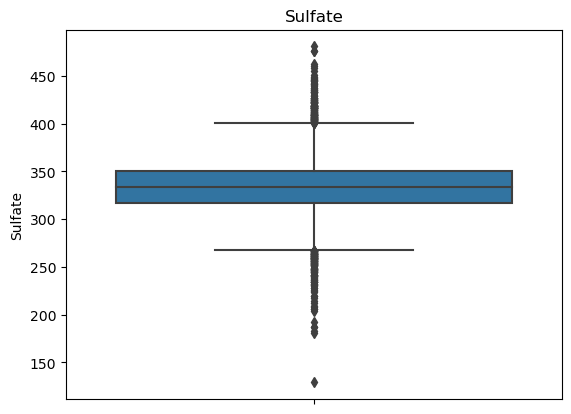

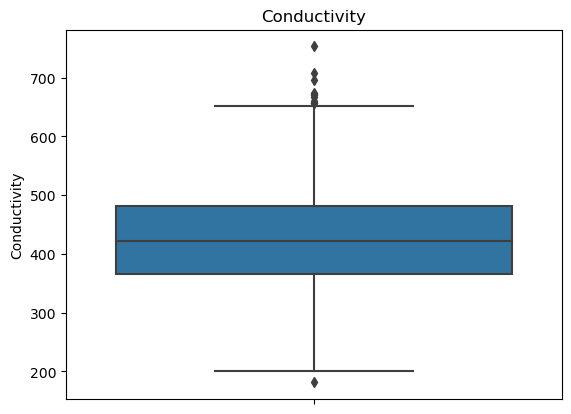

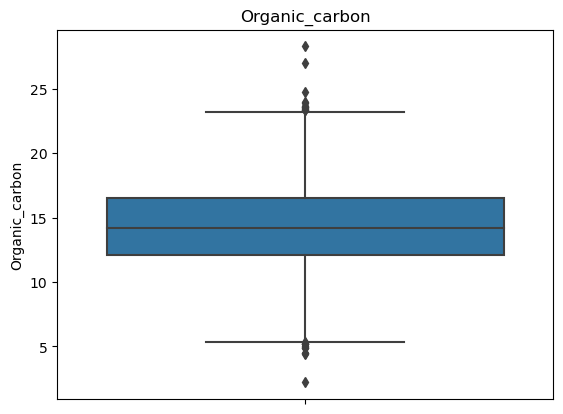

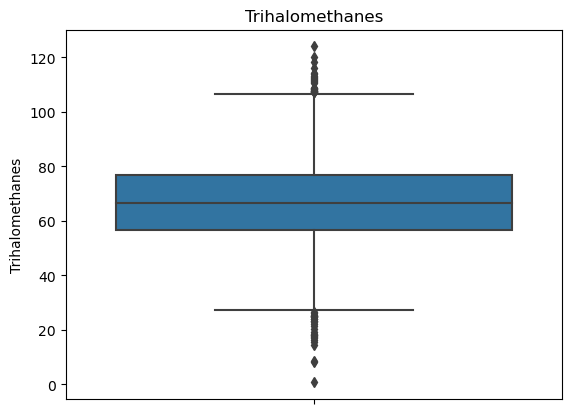

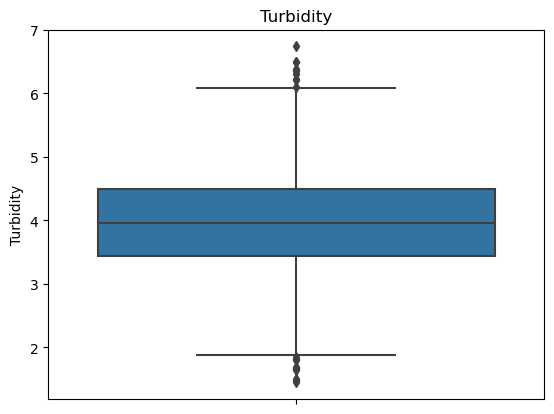

In [19]:
for col in cols:
    plt.figure()
    sns.boxplot(data=data, y=col)
    plt.title(col)
    plt.show()


In [20]:
X = data.drop("Potability", axis=1)
y = data["Potability"]

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.5929878048780488

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.614329268292683

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.5670731707317073